<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint7/Module4/O2_ExplainIndividualPredictionsWithShapleyValuePlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Shapley values look at each feature's contribution to the single row prediction and explain exactly how it is different from the average prediction.

In [2]:
# Load the dataset
import pandas as pd
wine = pd.read_csv('winequality-red.csv')
wine.head()

# Set the features list and target variable
target = 'quality'
X = wine.drop(target, axis=1)

# Create the target array
y = wine['quality']

# Map the target to a binary class at quality = 5
y = y.apply(lambda x: 0 if x <= 5 else 1)

In [3]:
!pip install category_encoders
!pip install pdpbox
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.3 MB/s eta 0:00:00


In [4]:
# import shap
import shap

# Instantiate and fit the model
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
wine_model = xgb.fit(X, y)

# Shap explainer initilization
shap_ex = shap.TreeExplainer(wine_model)

# Determine Shap values
shap_values = shap_ex.shap_values(X)

[01:40:51] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


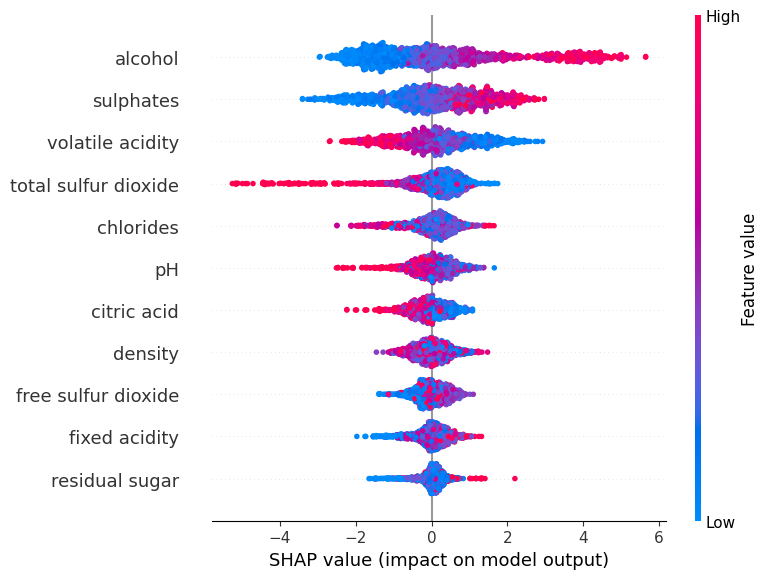

In [5]:
import matplotlib.pyplot as plt

# Calculate the shapley values
shap_values = shap_ex.shap_values(X)

shap.summary_plot(shap_values, X, feature_names=X.columns)


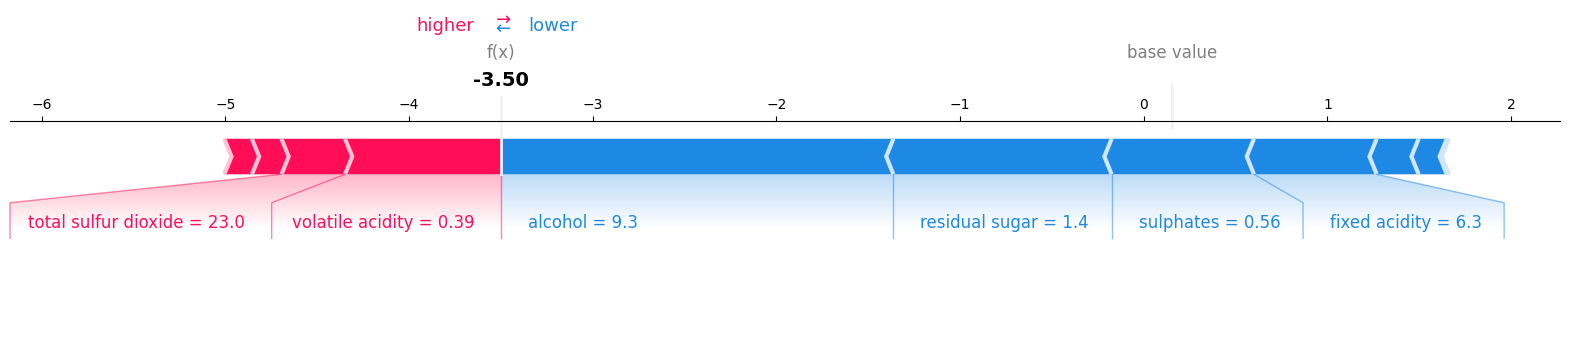

In [8]:
# Initialize the plot
shap.initjs()

# shap.force_plot(shap_ex.expected_value, shap_values[25,:], X.iloc[25,:])
  # old line of code, we need to add 'matplotlib=True' to make it work on google colab

shap.force_plot(shap_ex.expected_value, shap_values[25,:], X.iloc[25,:],
    matplotlib=True)

We can interpret the above plot in the following way: For the sample in 25th row, higher volatile acidity helped improve the wine quality, whereas a higher alcohol content and residual sugar (and others) resulted in lowering the quality of wine.